#1- Diabetes Prediction Dataset

The Diabetes prediction dataset is a collection of medical and demographic data from patients, along with their diabetes status (positive or negative). The data includes features such as age, gender, body mass index (BMI), hypertension, heart disease, smoking history, HbA1c level, and blood glucose level. This dataset can be used to build machine learning models to predict diabetes in patients based on their medical history and demographic information. This can be useful for healthcare professionals in identifying patients who may be at risk of developing diabetes and in developing personalized treatment plans. Additionally, the dataset can be used by researchers to explore the relationships between various medical and demographic factors and the likelihood of developing diabetes.

#Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Import Dataset

In [2]:
df = pd.read_csv('/content/diabetes_prediction_dataset.csv')

In [3]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


#Data Pre-Processing

In [11]:
df = df.drop_duplicates()

In [12]:
for column in df.columns:
    num_distinct_values = len(df[column].unique())
    print(f"{column}: {num_distinct_values} distinct values")

gender: 3 distinct values
age: 102 distinct values
hypertension: 2 distinct values
heart_disease: 2 distinct values
smoking_history: 6 distinct values
bmi: 4247 distinct values
HbA1c_level: 18 distinct values
blood_glucose_level: 18 distinct values
diabetes: 2 distinct values


In [13]:
print(df.isnull().sum())

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


In [14]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000
mean,41.794326,0.077601,0.040803,27.321461,5.532609,138.218231,0.088220
std,22.462948,0.267544,0.197833,6.767716,1.073232,40.909771,0.283616
min,0.080000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.000000,0.000000,23.400000,4.800000,100.000000,0.000000
50%,43.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,59.000000,0.000000,0.000000,29.860000,6.200000,159.000000,0.000000
max,80.000000,1.000000,1.000000,95.690000,9.000000,300.000000,1.000000


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96146 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               96146 non-null  object 
 1   age                  96146 non-null  float64
 2   hypertension         96146 non-null  int64  
 3   heart_disease        96146 non-null  int64  
 4   smoking_history      96146 non-null  object 
 5   bmi                  96146 non-null  float64
 6   HbA1c_level          96146 non-null  float64
 7   blood_glucose_level  96146 non-null  int64  
 8   diabetes             96146 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 7.3+ MB


In [16]:
len(df)

96146

In [19]:
df = df[df['gender'] != 'Other']

#Data Visualization

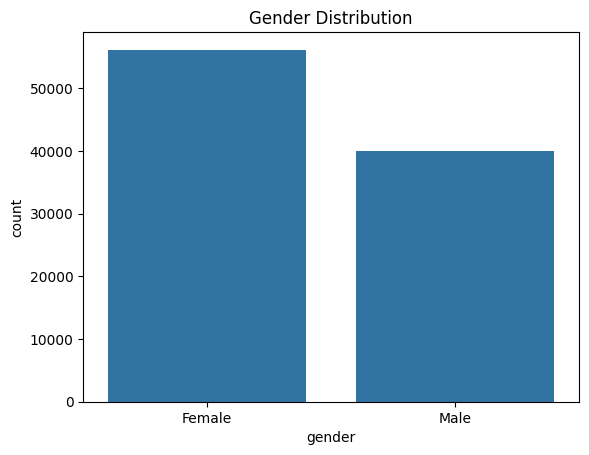

In [20]:
sns.countplot(x='gender', data=df)
plt.title('Gender Distribution')
plt.show()

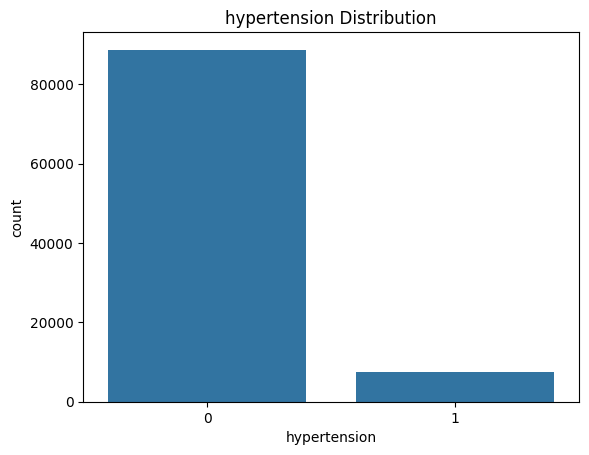

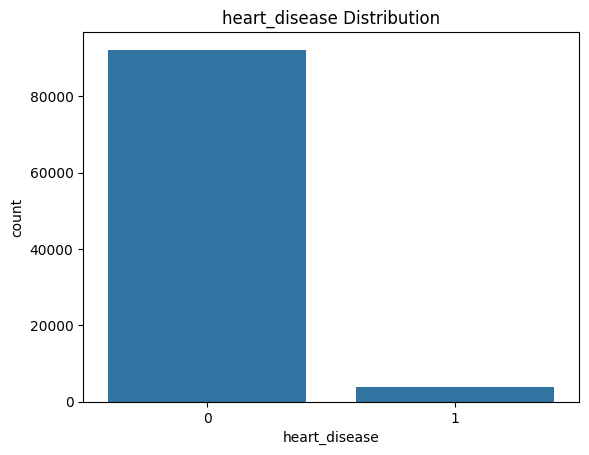

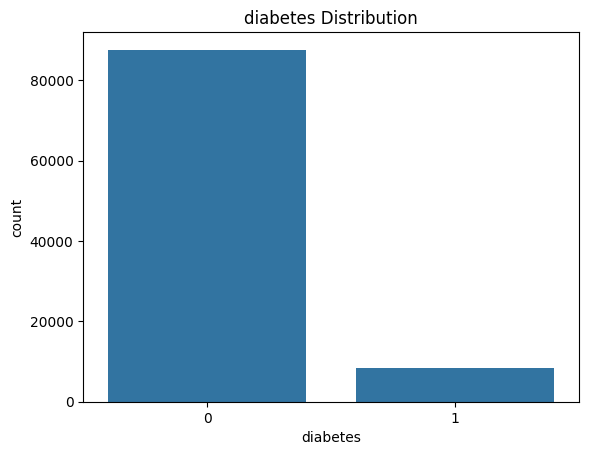

In [21]:
for col in ['hypertension', 'heart_disease', 'diabetes']:
    sns.countplot(x=col, data=df)
    plt.title(f'{col} Distribution')
    plt.show()

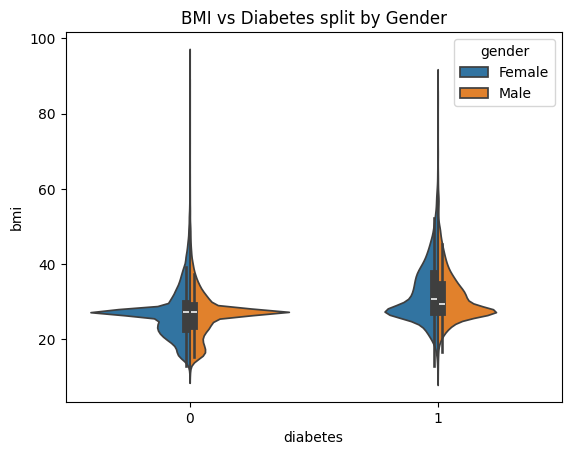

In [22]:
sns.violinplot(x='diabetes', y='bmi', hue='gender', split=True, data=df)
plt.title('BMI vs Diabetes split by Gender')
plt.show()

#Encoding and Training

In [23]:
def perform_one_hot_encoding(df, column_name):
    # Perform one-hot encoding on the specified column
    dummies = pd.get_dummies(df[column_name], prefix=column_name)

    # Drop the original column and append the new dummy columns to the dataframe
    df = pd.concat([df.drop(column_name, axis=1), dummies], axis=1)

    return df

df = perform_one_hot_encoding(df, 'gender')

df = perform_one_hot_encoding(df, 'smoking_history')

In [24]:
df.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Female,gender_Male,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,80.0,0,1,25.19,6.6,140,0,True,False,False,False,False,False,True,False
1,54.0,0,0,27.32,6.6,80,0,True,False,True,False,False,False,False,False
2,28.0,0,0,27.32,5.7,158,0,False,True,False,False,False,False,True,False
3,36.0,0,0,23.45,5.0,155,0,True,False,False,True,False,False,False,False
4,76.0,1,1,20.14,4.8,155,0,False,True,False,True,False,False,False,False


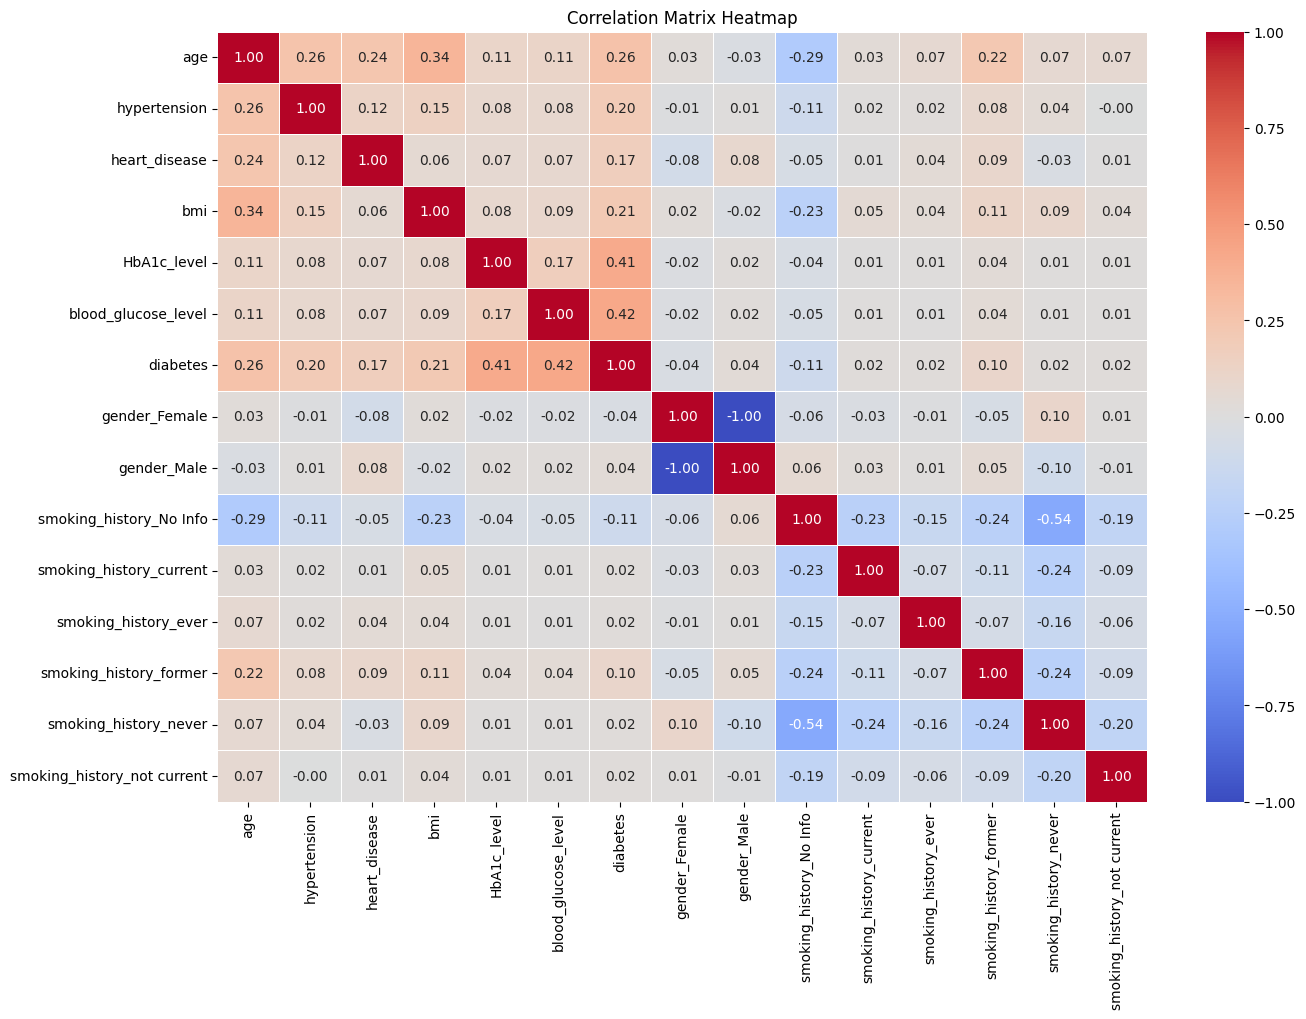

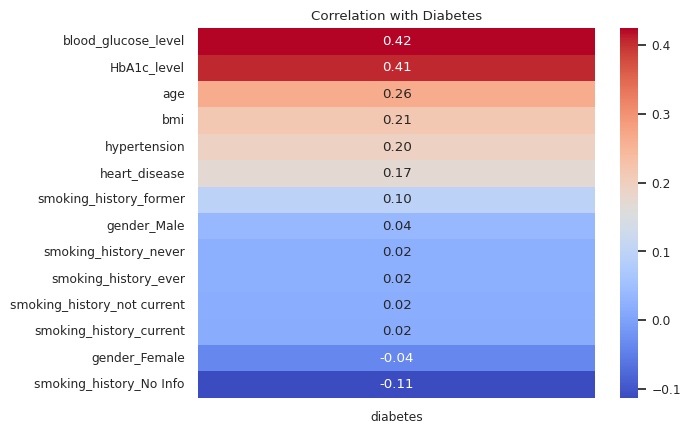

In [26]:
# Compute the correlation matrix
correlation_matrix = df.corr()
#Graph I.
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()


#Graph II
# Create a heatmap of the correlations with the target column
corr = df.corr()
target_corr = corr['diabetes'].drop('diabetes')

# Sort correlation values in descending order
target_corr_sorted = target_corr.sort_values(ascending=False)

sns.set(font_scale=0.8)
sns.set_style("white")
sns.set_palette("PuBuGn_d")
sns.heatmap(target_corr_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
plt.title('Correlation with Diabetes')
plt.show()

In [27]:
X = df.drop(["diabetes"], axis=1)
y = df["diabetes"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

#Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

LRclassifier = LogisticRegression(solver='liblinear', max_iter=5000)
LRclassifier.fit(X_train, y_train)

y_pred = LRclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
LRAcc = accuracy_score(y_pred,y_test)
print('Logistic Regression accuracy is: {:.2f}%'.format(LRAcc*100))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98     26304
           1       0.88      0.62      0.73      2535

    accuracy                           0.96     28839
   macro avg       0.92      0.81      0.85     28839
weighted avg       0.96      0.96      0.96     28839

[[26087   217]
 [  964  1571]]
Logistic Regression accuracy is: 95.90%


#KN Classifier

In [30]:
from sklearn.neighbors import KNeighborsClassifier
KNclassifier = KNeighborsClassifier(n_neighbors=20)
KNclassifier.fit(X_train, y_train)

y_pred = KNclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
KNAcc = accuracy_score(y_pred,y_test)
print('K Neighbours accuracy is: {:.2f}%'.format(KNAcc*100))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97     26304
           1       0.97      0.44      0.61      2535

    accuracy                           0.95     28839
   macro avg       0.96      0.72      0.79     28839
weighted avg       0.95      0.95      0.94     28839

[[26271    33]
 [ 1415  1120]]
K Neighbours accuracy is: 94.98%


#SVC

In [31]:
from sklearn.svm import SVC
SVCclassifier = SVC(kernel='linear', max_iter=251)
SVCclassifier.fit(X_train, y_train)

y_pred = SVCclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
SVCAcc = accuracy_score(y_pred,y_test)
print('SVC accuracy is: {:.2f}%'.format(SVCAcc*100))

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=251).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.96      0.86      0.91     26304
           1       0.30      0.66      0.42      2535

    accuracy                           0.84     28839
   macro avg       0.63      0.76      0.66     28839
weighted avg       0.90      0.84      0.86     28839

[[22497  3807]
 [  870  1665]]
SVC accuracy is: 83.78%


#Categorical Naive Bayes

In [32]:
from sklearn.naive_bayes import CategoricalNB
NBclassifier1 = CategoricalNB()
NBclassifier1.fit(X_train, y_train)

y_pred = NBclassifier1.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
NBAcc1 = accuracy_score(y_pred,y_test)
print('Naive Bayes accuracy is: {:.2f}%'.format(NBAcc1*100))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     26304
           1       0.83      0.71      0.76      2535

    accuracy                           0.96     28839
   macro avg       0.90      0.85      0.87     28839
weighted avg       0.96      0.96      0.96     28839

[[25926   378]
 [  740  1795]]
Naive Bayes accuracy is: 96.12%


#Gaussian Naive Bayes

In [33]:
from sklearn.naive_bayes import GaussianNB
NBclassifier2 = GaussianNB()
NBclassifier2.fit(X_train, y_train)

y_pred = NBclassifier2.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
NBAcc2 = accuracy_score(y_pred,y_test)
print('Gaussian Naive Bayes accuracy is: {:.2f}%'.format(NBAcc2*100))

              precision    recall  f1-score   support

           0       0.97      0.92      0.94     26304
           1       0.45      0.66      0.53      2535

    accuracy                           0.90     28839
   macro avg       0.71      0.79      0.74     28839
weighted avg       0.92      0.90      0.91     28839

[[24264  2040]
 [  869  1666]]
Gaussian Naive Bayes accuracy is: 89.91%


#Decision Tree

In [34]:
from sklearn.tree import DecisionTreeClassifier
DTclassifier = DecisionTreeClassifier(max_leaf_nodes=20)
DTclassifier.fit(X_train, y_train)

y_pred = DTclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
DTAcc = accuracy_score(y_pred,y_test)
print('Decision Tree accuracy is: {:.2f}%'.format(DTAcc*100))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     26304
           1       1.00      0.66      0.80      2535

    accuracy                           0.97     28839
   macro avg       0.98      0.83      0.89     28839
weighted avg       0.97      0.97      0.97     28839

[[26304     0]
 [  850  1685]]
Decision Tree accuracy is: 97.05%


#Random Forest

In [35]:
from sklearn.ensemble import RandomForestClassifier

RFclassifier = RandomForestClassifier(max_leaf_nodes=30)
RFclassifier.fit(X_train, y_train)

y_pred = RFclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
RFAcc = accuracy_score(y_pred,y_test)
print('Random Forest accuracy is: {:.2f}%'.format(RFAcc*100))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     26304
           1       1.00      0.66      0.80      2535

    accuracy                           0.97     28839
   macro avg       0.98      0.83      0.89     28839
weighted avg       0.97      0.97      0.97     28839

[[26304     0]
 [  850  1685]]
Random Forest accuracy is: 97.05%


In [40]:
compare = pd.DataFrame({'Model': ['Logistic Regression', 'K Neighbors', 'SVM', 'Categorical NB', 'Gaussian NB', 'Decision Tree', 'Random Forest'],
                        'Accuracy': [LRAcc*100, KNAcc*100, SVCAcc*100, NBAcc1*100, NBAcc2*100, DTAcc*100, RFAcc*100]})
compare.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
5,Decision Tree,97.052602
6,Random Forest,97.052602
3,Categorical NB,96.123305
0,Logistic Regression,95.904851
1,K Neighbors,94.979021
4,Gaussian NB,89.912965
2,SVM,83.782378


#2- Income Dataset

The dataset provided predictive feature like education , employment status , marital status to predict if the salary is greater than $50K

It can be used to practice machine learning problem like classification.

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
df = pd.read_csv('/content/Income_Dataset.csv')

In [43]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
0,67,Private,366425,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60,United-States,1
1,17,Private,244602,12th,8,Never-married,Other-service,Own-child,White,Male,0,0,15,United-States,0
2,31,Private,174201,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
3,58,State-gov,110199,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,0
4,25,State-gov,149248,Some-college,10,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,United-States,0


#Data Pre-processing

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43957 entries, 0 to 43956
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              43957 non-null  int64 
 1   workclass        41459 non-null  object
 2   fnlwgt           43957 non-null  int64 
 3   education        43957 non-null  object
 4   educational-num  43957 non-null  int64 
 5   marital-status   43957 non-null  object
 6   occupation       41451 non-null  object
 7   relationship     43957 non-null  object
 8   race             43957 non-null  object
 9   gender           43957 non-null  object
 10  capital-gain     43957 non-null  int64 
 11  capital-loss     43957 non-null  int64 
 12  hours-per-week   43957 non-null  int64 
 13  native-country   43194 non-null  object
 14  income_>50K      43957 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 5.0+ MB


In [46]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income_>50K
count,43957.000000,4.395700e+04,43957.000000,43957.000000,43957.000000,43957.000000,43957.000000
mean,38.617149,1.896730e+05,10.074118,1093.559797,88.246491,40.407694,0.239279
std,13.734401,1.058215e+05,2.575092,7570.536063,404.588410,12.400303,0.426648
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.174960e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.781000e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.376710e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [47]:
df.isnull().sum()

age                   0
workclass          2498
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2506
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      763
income_>50K           0
dtype: int64

In [49]:
df = df.dropna()

In [51]:
df = df.drop_duplicates()

In [53]:
len(df)

40686

In [74]:
for column in df.columns:
    num_distinct_values = len(df[column].unique())
    print(f"{column}: {num_distinct_values} distinct values")

age: 74 distinct values
workclass: 7 distinct values
fnlwgt: 24985 distinct values
education: 16 distinct values
educational-num: 16 distinct values
marital-status: 7 distinct values
occupation: 14 distinct values
relationship: 6 distinct values
race: 5 distinct values
gender: 2 distinct values
capital-gain: 120 distinct values
capital-loss: 95 distinct values
hours-per-week: 94 distinct values
native-country: 41 distinct values
income_>50K: 2 distinct values


#Data Visualization

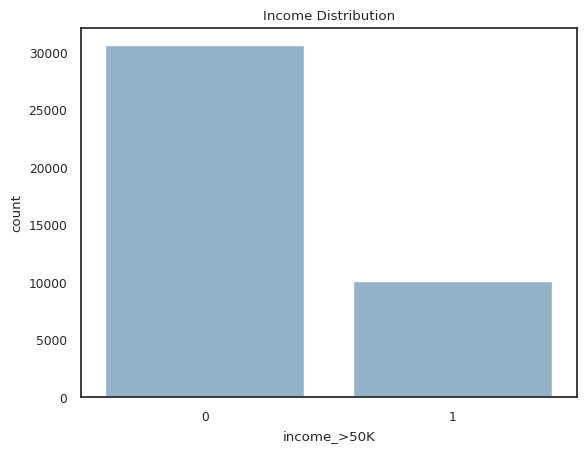

In [55]:
sns.countplot(data=df,x='income_>50K')
plt.title('Income Distribution')
plt.show()

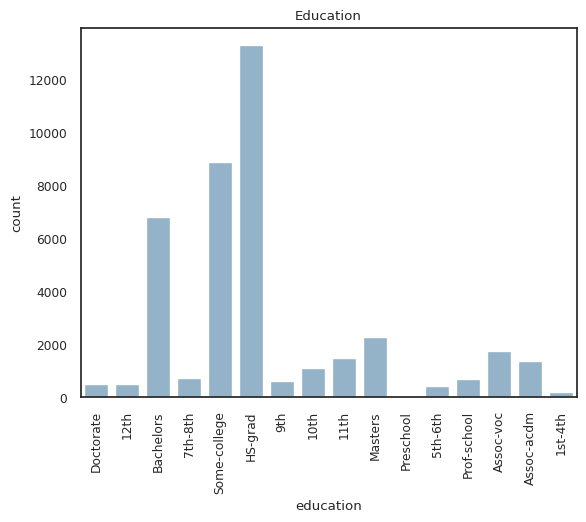

In [58]:
sns.countplot(data=df,x='education')
plt.title('Education')
plt.xticks(rotation=90)
plt.show()

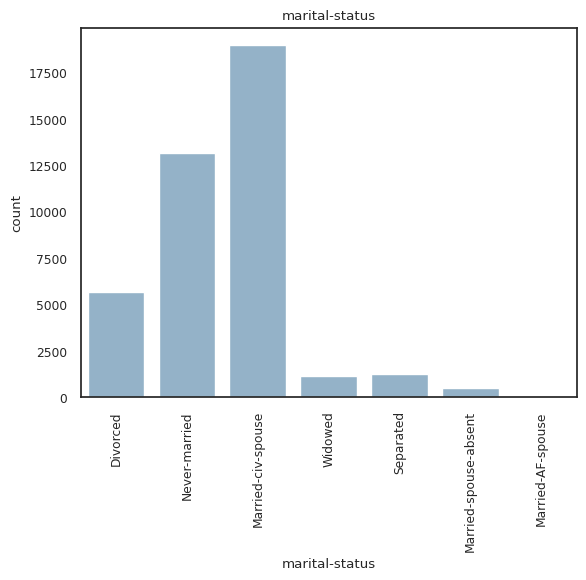

In [59]:
sns.countplot(data=df,x='marital-status')
plt.title('marital-status')
plt.xticks(rotation=90)
plt.show()

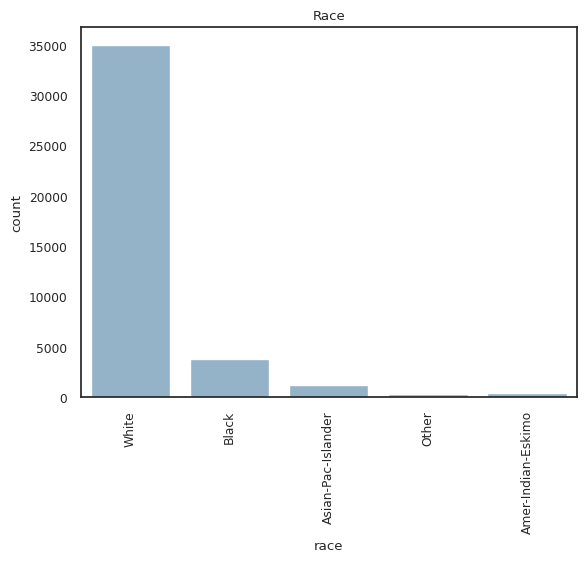

In [60]:
sns.countplot(data=df,x='race')
plt.title('Race')
plt.xticks(rotation=90)
plt.show()

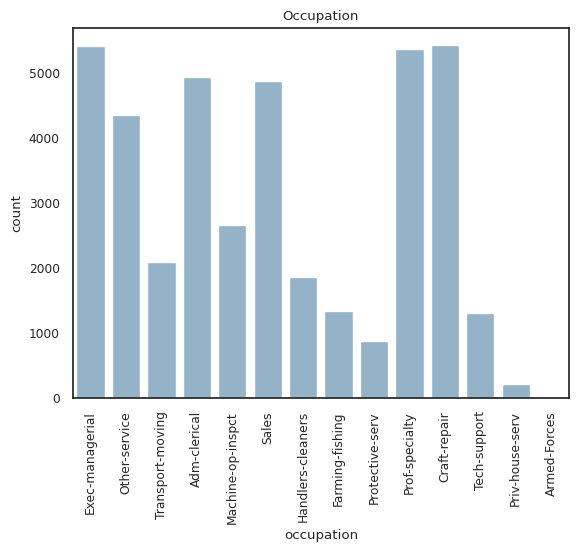

In [61]:
sns.countplot(data=df,x='occupation')
plt.title('Occupation')
plt.xticks(rotation=90)
plt.show()

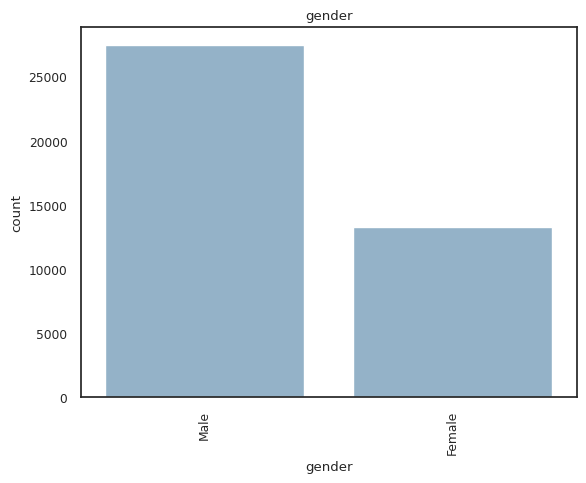

In [63]:
sns.countplot(data=df,x='gender')
plt.title('gender')
plt.xticks(rotation=90)
plt.show()

#Label Encoding

In [66]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in df.select_dtypes(include='object'):
    df[col] = le.fit_transform(df[col])

df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
0,67,2,366425,10,16,0,3,1,4,1,99999,0,60,38,1
1,17,2,244602,2,8,4,7,3,4,1,0,0,15,38,0
2,31,2,174201,9,13,2,3,0,4,1,0,0,40,38,1
3,58,5,110199,5,4,2,13,0,4,1,0,0,40,38,0
4,25,5,149248,15,10,4,7,1,2,1,0,0,40,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43952,52,2,68982,9,13,2,3,0,4,1,0,0,50,38,1
43953,19,2,116562,11,9,4,7,3,4,0,0,0,40,38,0
43954,30,2,197947,15,10,0,11,1,4,1,0,0,58,38,0
43955,46,2,97883,9,13,4,11,1,4,0,0,0,35,38,0


#Heatmap

<Axes: >

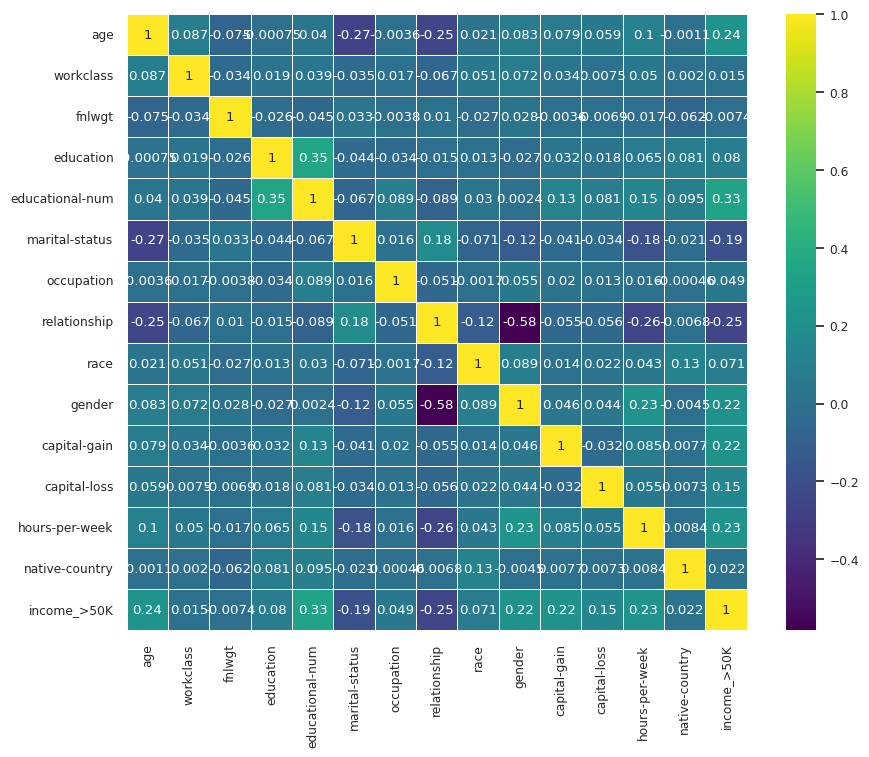

In [67]:
plt.figure(figsize=(10,8),dpi=100)
sns.heatmap(df.corr(),cmap="viridis",annot=True,linewidth=0.5)

#Training

In [68]:
X = df.drop(["income_>50K"], axis=1)
y = df["income_>50K"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

#Algorithms

#Logistic Regression

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

LRclassifier = LogisticRegression(solver='liblinear', max_iter=5000)
LRclassifier.fit(X_train, y_train)

y_pred = LRclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
LRAcc = accuracy_score(y_pred,y_test)
print('Logistic Regression accuracy is: {:.2f}%'.format(LRAcc*100))

              precision    recall  f1-score   support

           0       0.80      0.95      0.87      9196
           1       0.66      0.29      0.40      3010

    accuracy                           0.79     12206
   macro avg       0.73      0.62      0.64     12206
weighted avg       0.77      0.79      0.75     12206

[[8742  454]
 [2144  866]]
Logistic Regression accuracy is: 78.72%


#K neighbors

In [70]:
from sklearn.neighbors import KNeighborsClassifier
KNclassifier = KNeighborsClassifier(n_neighbors=20)
KNclassifier.fit(X_train, y_train)

y_pred = KNclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
KNAcc = accuracy_score(y_pred,y_test)
print('K Neighbours accuracy is: {:.2f}%'.format(KNAcc*100))

              precision    recall  f1-score   support

           0       0.79      0.99      0.88      9196
           1       0.84      0.20      0.33      3010

    accuracy                           0.79     12206
   macro avg       0.82      0.60      0.60     12206
weighted avg       0.80      0.79      0.74     12206

[[9079  117]
 [2398  612]]
K Neighbours accuracy is: 79.40%


#SVC

In [71]:
from sklearn.svm import SVC
SVCclassifier = SVC(kernel='linear', max_iter=251)
SVCclassifier.fit(X_train, y_train)

y_pred = SVCclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
SVCAcc = accuracy_score(y_pred,y_test)
print('SVC accuracy is: {:.2f}%'.format(SVCAcc*100))

              precision    recall  f1-score   support

           0       0.74      0.48      0.58      9196
           1       0.24      0.49      0.32      3010

    accuracy                           0.48     12206
   macro avg       0.49      0.49      0.45     12206
weighted avg       0.62      0.48      0.52     12206

[[4420 4776]
 [1534 1476]]
SVC accuracy is: 48.30%


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=251).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


#Guassian Naive Bayes

In [75]:
from sklearn.naive_bayes import GaussianNB
NBclassifier2 = GaussianNB()
NBclassifier2.fit(X_train, y_train)

y_pred = NBclassifier2.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
NBAcc2 = accuracy_score(y_pred,y_test)
print('Gaussian Naive Bayes accuracy is: {:.2f}%'.format(NBAcc2*100))

              precision    recall  f1-score   support

           0       0.81      0.95      0.87      9196
           1       0.64      0.30      0.41      3010

    accuracy                           0.79     12206
   macro avg       0.73      0.62      0.64     12206
weighted avg       0.77      0.79      0.76     12206

[[8691  505]
 [2095  915]]
Gaussian Naive Bayes accuracy is: 78.70%


#Decision Tree

In [76]:
from sklearn.tree import DecisionTreeClassifier
DTclassifier = DecisionTreeClassifier(max_leaf_nodes=20)
DTclassifier.fit(X_train, y_train)

y_pred = DTclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
DTAcc = accuracy_score(y_pred,y_test)
print('Decision Tree accuracy is: {:.2f}%'.format(DTAcc*100))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90      9196
           1       0.72      0.63      0.68      3010

    accuracy                           0.85     12206
   macro avg       0.80      0.78      0.79     12206
weighted avg       0.85      0.85      0.85     12206

[[8466  730]
 [1101 1909]]
Decision Tree accuracy is: 85.00%


#Random Forest

In [77]:
from sklearn.ensemble import RandomForestClassifier

RFclassifier = RandomForestClassifier(max_leaf_nodes=30)
RFclassifier.fit(X_train, y_train)

y_pred = RFclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
RFAcc = accuracy_score(y_pred,y_test)
print('Random Forest accuracy is: {:.2f}%'.format(RFAcc*100))

              precision    recall  f1-score   support

           0       0.86      0.95      0.91      9196
           1       0.80      0.54      0.64      3010

    accuracy                           0.85     12206
   macro avg       0.83      0.75      0.78     12206
weighted avg       0.85      0.85      0.84     12206

[[8780  416]
 [1385 1625]]
Random Forest accuracy is: 85.24%


In [78]:
compare = pd.DataFrame({'Model': ['Logistic Regression', 'K Neighbors', 'SVM', 'Gaussian NB', 'Decision Tree', 'Random Forest'],
                        'Accuracy': [LRAcc*100, KNAcc*100, SVCAcc*100, NBAcc2*100, DTAcc*100, RFAcc*100]})
compare.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
5,Random Forest,85.244961
4,Decision Tree,84.999181
1,K Neighbors,79.395379
0,Logistic Regression,78.715386
3,Gaussian NB,78.699000
2,SVM,48.304113


#Reason For Poor results
Data imbalance usually reflects an unequal distribution of classes within a dataset. For example, in a income evaluation dataset, most of the income is higher that 50.000dollars. We have very small data for >50K. This leaves us with something like 50:1 ratio between the >50K and <50K classes.

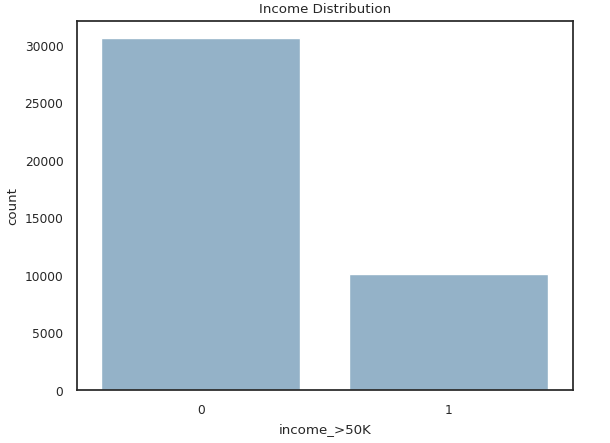

#3- Water Potability

ph: pH of 1. water (0 to 14).

Hardness: Capacity of water to precipitate soap in mg/L.

Solids: Total dissolved solids in ppm.

Chloramines: Amount of Chloramines in ppm.

Sulfate: Amount of Sulfates dissolved in mg/L.

Conductivity: Electrical conductivity of water in μS/cm.

Organic_carbon: Amount of organic carbon in ppm.

Trihalomethanes: Amount of Trihalomethanes in μg/L.

Turbidity: Measure of light emiting property of water in NTU.

Potability: Indicates if water is safe for human consumption. Potable - 1 and Not potable - 0

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [80]:
df= pd.read_csv('water_potability.csv')

In [81]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


#Data Pre-Processing

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [84]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [86]:
print(df.isnull().sum())

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64


In [87]:
df=df.dropna()

In [88]:
df = df.drop_duplicates()

In [89]:
len(df)

2011

In [90]:
for column in df.columns:
    num_distinct_values = len(df[column].unique())
    print(f"{column}: {num_distinct_values} distinct values")

ph: 2011 distinct values
Hardness: 2011 distinct values
Solids: 2011 distinct values
Chloramines: 2011 distinct values
Sulfate: 2011 distinct values
Conductivity: 2011 distinct values
Organic_carbon: 2011 distinct values
Trihalomethanes: 2011 distinct values
Turbidity: 2011 distinct values
Potability: 2 distinct values


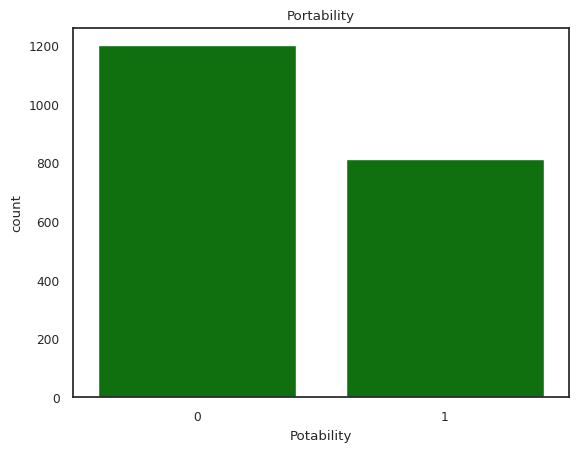

In [96]:
sns.countplot(data=df,x='Potability',color='green')
plt.title('Portability')
plt.show()

In [98]:
import plotly.express as px

fig = px.scatter_matrix(df, df.drop('Potability', axis=1), height=1250, width=1250, template='plotly_white', opacity=0.7,
                        color='Potability', symbol='Potability', color_continuous_scale='bluered')

fig.update_layout(font_family='monospace', font_size=10,
                  coloraxis_showscale=False,
                  legend=dict(x=0.02, y=1.07, bgcolor='rgba(0,0,0,0)'),
                  title=dict(text='Scatter Plot Matrix between Features', x=0.5, y=0.97,
                             font=dict(color='rgba(0,0,0,0)', size=24)))
fig.show()


<Axes: >

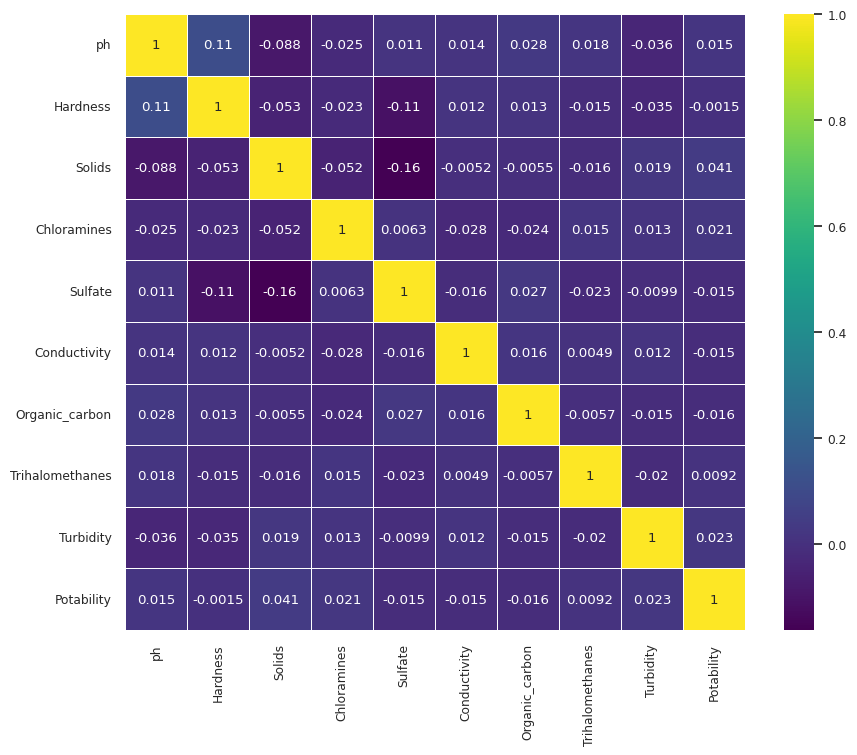

In [99]:
plt.figure(figsize=(10,8),dpi=100)
sns.heatmap(df.corr(),cmap="viridis",annot=True,linewidth=0.5)

#Training

In [101]:
X = df.drop('Potability',axis=1)
y = df['Potability']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#Algorithms

In [102]:
from sklearn.linear_model import LogisticRegression
LRclassifier = LogisticRegression(solver='liblinear', max_iter=5000)
LRclassifier.fit(X_train, y_train)

y_pred = LRclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
LRAcc = accuracy_score(y_pred,y_test)
print('Logistic Regression accuracy is: {:.2f}%'.format(LRAcc*100))

              precision    recall  f1-score   support

           0       0.58      0.99      0.73       351
           1       0.50      0.01      0.02       253

    accuracy                           0.58       604
   macro avg       0.54      0.50      0.37       604
weighted avg       0.55      0.58      0.43       604

[[349   2]
 [251   2]]
Logistic Regression accuracy is: 58.11%


In [103]:
from sklearn.neighbors import KNeighborsClassifier
KNclassifier = KNeighborsClassifier(n_neighbors=20)
KNclassifier.fit(X_train, y_train)

y_pred = KNclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
KNAcc = accuracy_score(y_pred,y_test)
print('K Neighbours accuracy is: {:.2f}%'.format(KNAcc*100))

              precision    recall  f1-score   support

           0       0.64      0.91      0.75       351
           1       0.70      0.29      0.41       253

    accuracy                           0.65       604
   macro avg       0.67      0.60      0.58       604
weighted avg       0.66      0.65      0.61       604

[[319  32]
 [179  74]]
K Neighbours accuracy is: 65.07%


In [104]:
from sklearn.svm import SVC
SVCclassifier = SVC(kernel='linear', max_iter=251)
SVCclassifier.fit(X_train, y_train)

y_pred = SVCclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
SVCAcc = accuracy_score(y_pred,y_test)
print('SVC accuracy is: {:.2f}%'.format(SVCAcc*100))

              precision    recall  f1-score   support

           0       0.58      0.30      0.40       351
           1       0.42      0.70      0.53       253

    accuracy                           0.47       604
   macro avg       0.50      0.50      0.46       604
weighted avg       0.52      0.47      0.45       604

[[107 244]
 [ 76 177]]
SVC accuracy is: 47.02%


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning:

Solver terminated early (max_iter=251).  Consider pre-processing your data with StandardScaler or MinMaxScaler.



In [106]:
from sklearn.naive_bayes import GaussianNB
NBclassifier2 = GaussianNB()
NBclassifier2.fit(X_train, y_train)

y_pred = NBclassifier2.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
NBAcc2 = accuracy_score(y_pred,y_test)
print('Gaussian Naive Bayes accuracy is: {:.2f}%'.format(NBAcc2*100))

              precision    recall  f1-score   support

           0       0.62      0.88      0.73       351
           1       0.60      0.25      0.36       253

    accuracy                           0.62       604
   macro avg       0.61      0.57      0.54       604
weighted avg       0.61      0.62      0.57       604

[[309  42]
 [189  64]]
Gaussian Naive Bayes accuracy is: 61.75%


In [107]:
from sklearn.tree import DecisionTreeClassifier
DTclassifier = DecisionTreeClassifier(max_leaf_nodes=20)
DTclassifier.fit(X_train, y_train)

y_pred = DTclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
DTAcc = accuracy_score(y_pred,y_test)
print('Decision Tree accuracy is: {:.2f}%'.format(DTAcc*100))

              precision    recall  f1-score   support

           0       0.67      0.85      0.75       351
           1       0.66      0.41      0.51       253

    accuracy                           0.67       604
   macro avg       0.66      0.63      0.63       604
weighted avg       0.66      0.67      0.65       604

[[298  53]
 [149 104]]
Decision Tree accuracy is: 66.56%


In [108]:
from sklearn.ensemble import RandomForestClassifier

RFclassifier = RandomForestClassifier(max_leaf_nodes=30)
RFclassifier.fit(X_train, y_train)

y_pred = RFclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
RFAcc = accuracy_score(y_pred,y_test)
print('Random Forest accuracy is: {:.2f}%'.format(RFAcc*100))

              precision    recall  f1-score   support

           0       0.65      0.92      0.76       351
           1       0.74      0.32      0.45       253

    accuracy                           0.67       604
   macro avg       0.69      0.62      0.60       604
weighted avg       0.69      0.67      0.63       604

[[322  29]
 [172  81]]
Random Forest accuracy is: 66.72%


In [109]:
compare = pd.DataFrame({'Model': ['Logistic Regression', 'K Neighbors', 'SVM', 'Gaussian NB', 'Decision Tree', 'Random Forest'],
                        'Accuracy': [LRAcc*100, KNAcc*100, SVCAcc*100, NBAcc2*100, DTAcc*100, RFAcc*100]})
compare.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
5,Random Forest,66.721854
4,Decision Tree,66.556291
1,K Neighbors,65.066225
3,Gaussian NB,61.754967
0,Logistic Regression,58.112583
2,SVM,47.019868


#Conclusion:
Most models performed poorly likely due to the significant discrepancies and imbalances in the dataset,